In [1]:
#!pip install mysql-connector-python

  Using cached mysql_connector_python-8.4.0-py2.py3-none-any.whl.metadata (1.9 kB)
Using cached mysql_connector_python-8.4.0-py2.py3-none-any.whl (565 kB)


In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid', palette = 'pastel')

# Configura la conexión a tu base de datos
config = {
    'user': 'root',       
    'password': '12345abcd', 
    'host': 'localhost',         
    'database': 'world' 
}

# Establece la conexión a la base de datos
conn = mysql.connector.connect(**config)
cursor = conn.cursor()



## DataFrame para city

In [2]:
query = """
SELECT * FROM city;
"""

cursor.execute(query)
resultados1 = cursor.fetchall()

# Obtén los nombres de las columnas
column_names = [desc[0] for desc in cursor.description]

# Crea el DataFrame
city = pd.DataFrame(resultados1, columns=column_names)

# Muestra el DataFrame
city.head()

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


## DataFrame para country

In [3]:
query = """
SELECT * FROM country
"""

cursor.execute(query)
resultados1 = cursor.fetchall()

# Obtén los nombres de las columnas
column_names = [desc[0] for desc in cursor.description]

# Crea el DataFrame
country = pd.DataFrame(resultados1, columns=column_names)

# Muestra el DataFrame
country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828.00,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.00,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63.20,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


## DataFrame para countrylanguage

In [4]:
query = """
SELECT * FROM countrylanguage;
"""

cursor.execute(query)
resultados1 = cursor.fetchall()

# Obtén los nombres de las columnas
column_names = [desc[0] for desc in cursor.description]

# Crea el DataFrame
countrylanguage = pd.DataFrame(resultados1, columns=column_names)

# Muestra el DataFrame
countrylanguage.head()

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9


# Visualizaciones

## Mostrar los nombres y las áreas de superficie de los cinco países más grandes del mundo

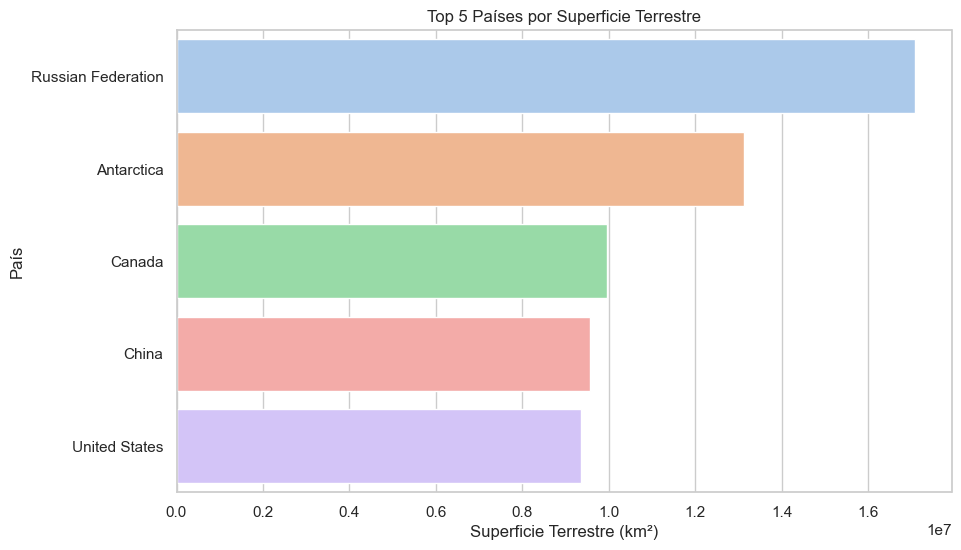

In [15]:
# Filtrar y ordenar los datos para obtener los cinco países más grandes por superficie
top5_countries = country[['Name', 'SurfaceArea']].sort_values(by='SurfaceArea', ascending=False).head(5)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='SurfaceArea', y='Name', data=top5_countries)
plt.title('Top 5 Países por Superficie Terrestre')
plt.xlabel('Superficie Terrestre (km²)')
plt.ylabel('País')

# Mostrar el gráfico
plt.show()

## Calcular la población total de todos los países de cada continente

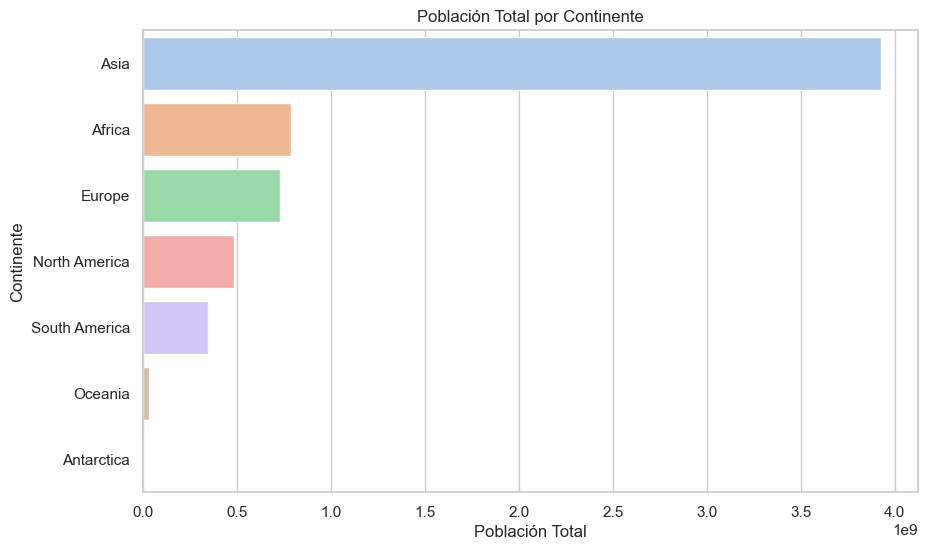

In [18]:
# Agrupar y sumar los datos para obtener la población total por continente
continent_population = country.groupby('Continent')['Population'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Population', y='Continent', data=continent_population.sort_values('Population', ascending=False))
plt.title('Población Total por Continente')
plt.xlabel('Población Total')
plt.ylabel('Continente')

# Mostrar el gráfico
plt.show()

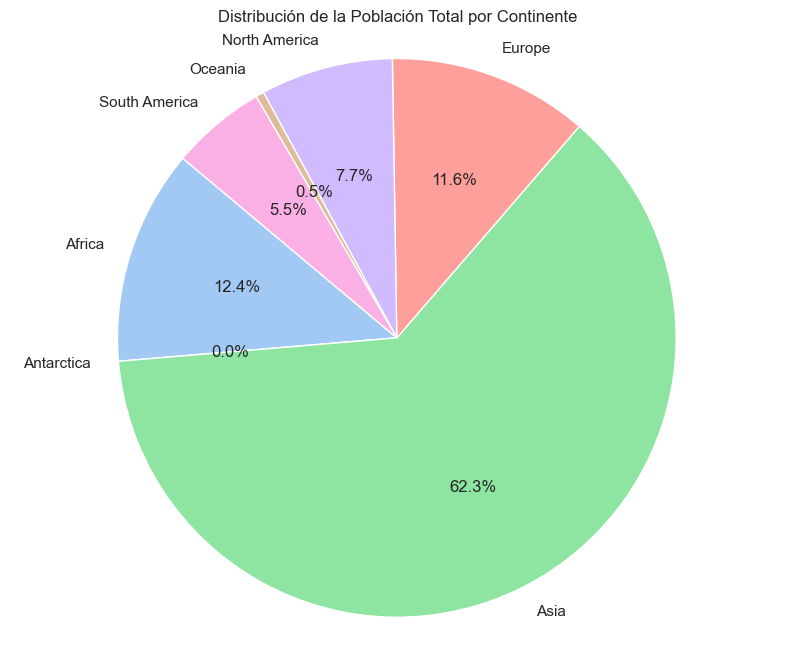

In [20]:
# Crear el diagrama de pastel
plt.figure(figsize=(10, 8))
plt.pie(continent_population['Population'], labels=continent_population['Continent'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', len(continent_population)))

plt.title('Distribución de la Población Total por Continente')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Mostrar el gráfico
plt.show()

## Pregunta 1: ¿Cuáles son los países con más ciudades en la base de datos?

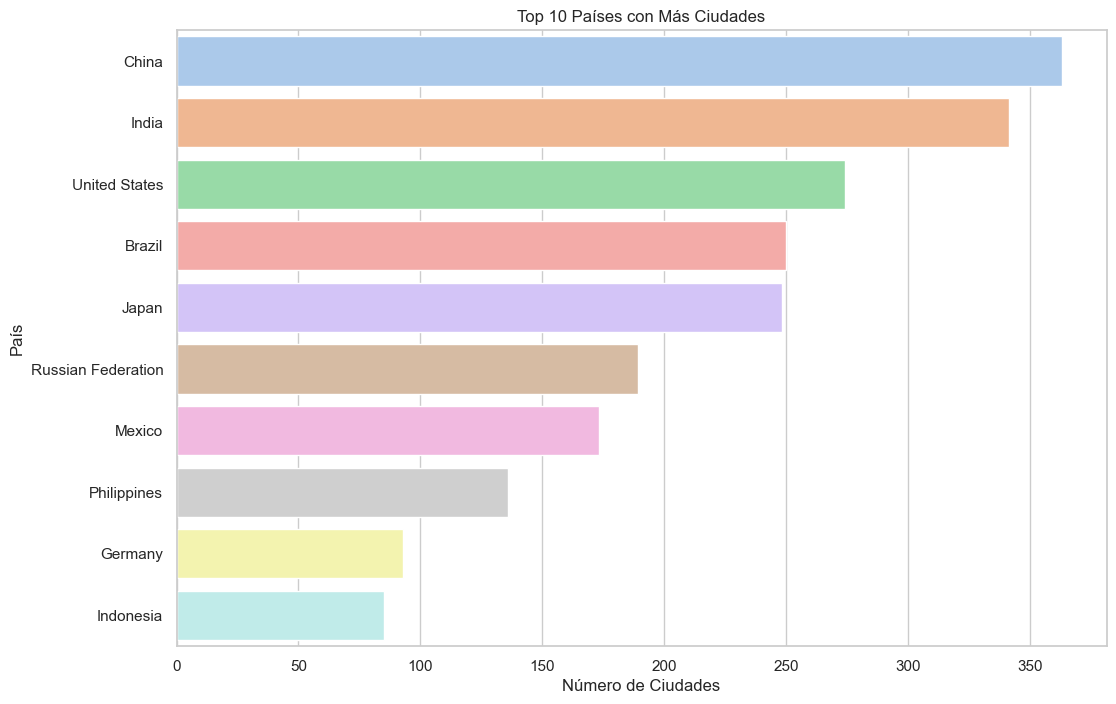

In [22]:
# Realizar la consulta y obtener los datos
city_count = city.groupby('CountryCode').size().reset_index(name='CityCount')
city_count = city_count.merge(country[['Code', 'Name']], left_on='CountryCode', right_on='Code').drop(columns=['Code'])
top10_countries = city_count.sort_values(by='CityCount', ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='CityCount', y='Name', data=top10_countries)
plt.title('Top 10 Países con Más Ciudades')
plt.xlabel('Número de Ciudades')
plt.ylabel('País')

# Mostrar el gráfico
plt.show()

## ¿Cuáles son las 10 ciudades más pobladas del mundo?

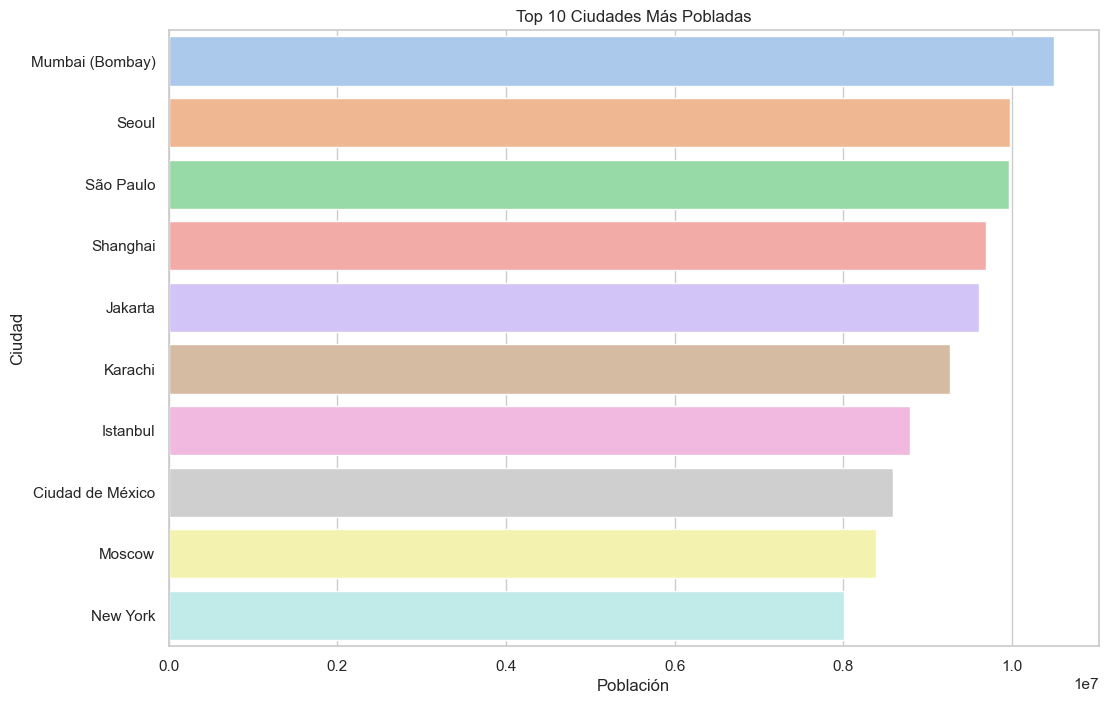

In [23]:
# Obtener las diez ciudades más pobladas
top10_cities = city[['Name', 'Population']].sort_values(by='Population', ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Population', y='Name', data=top10_cities)
plt.title('Top 10 Ciudades Más Pobladas')
plt.xlabel('Población')
plt.ylabel('Ciudad')

# Mostrar el gráfico
plt.show()

## ¿Qué países tienen una expectativa de vida mayor a 80 años?

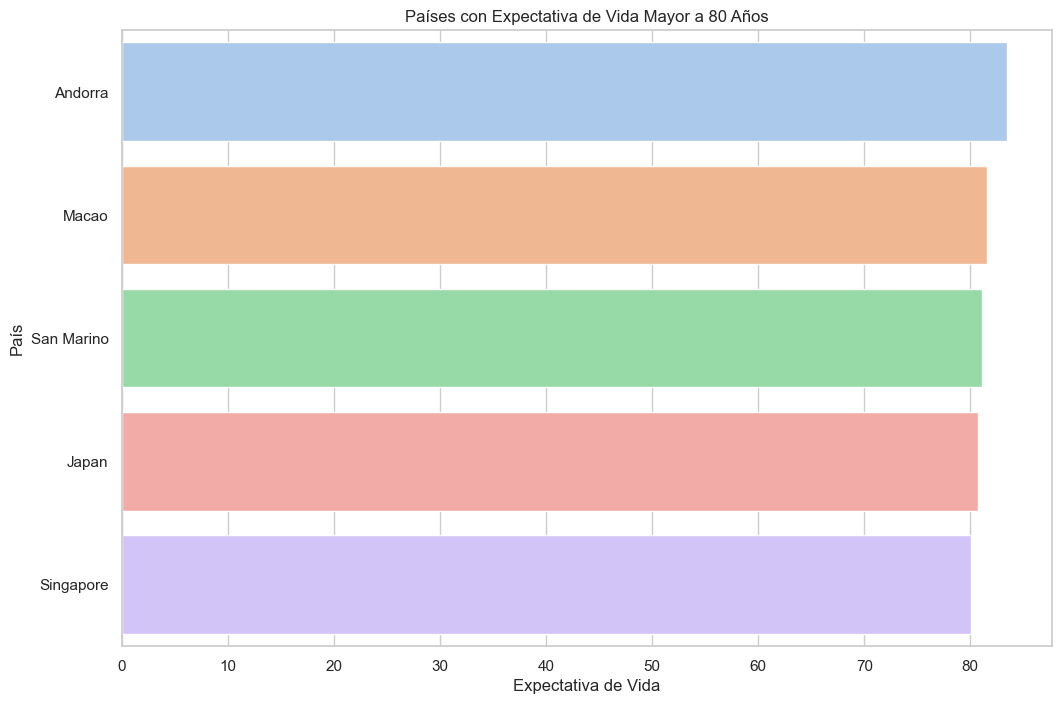

In [24]:
# Filtrar los países con una expectativa de vida mayor a 80 años
high_life_expectancy = country[country['LifeExpectancy'] > 80]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='LifeExpectancy', y='Name', data=high_life_expectancy.sort_values(by='LifeExpectancy', ascending=False))
plt.title('Países con Expectativa de Vida Mayor a 80 Años')
plt.xlabel('Expectativa de Vida')
plt.ylabel('País')

# Mostrar el gráfico
plt.show()

## ¿Cuáles son los continentes con la mayor cantidad de países?

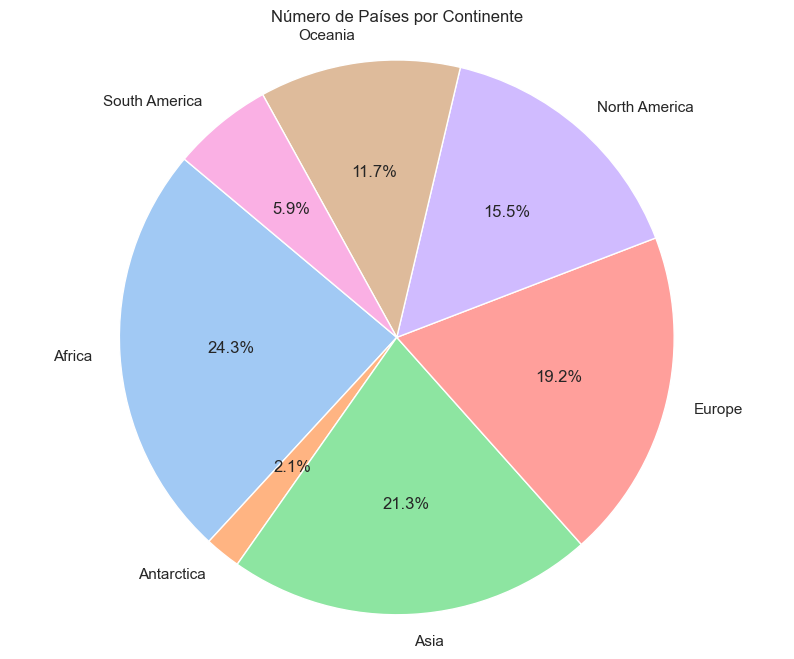

In [25]:
# Agrupar y contar el número de países por continente
continent_country_count = country.groupby('Continent').size().reset_index(name='CountryCount')

# Crear el diagrama de pastel
plt.figure(figsize=(10, 8))
plt.pie(continent_country_count['CountryCount'], labels=continent_country_count['Continent'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', len(continent_country_count)))

plt.title('Número de Países por Continente')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Mostrar el gráfico
plt.show()

## ¿Qué continentes tienen la mayor y menor densidad poblacional, y cuál es esa densidad?

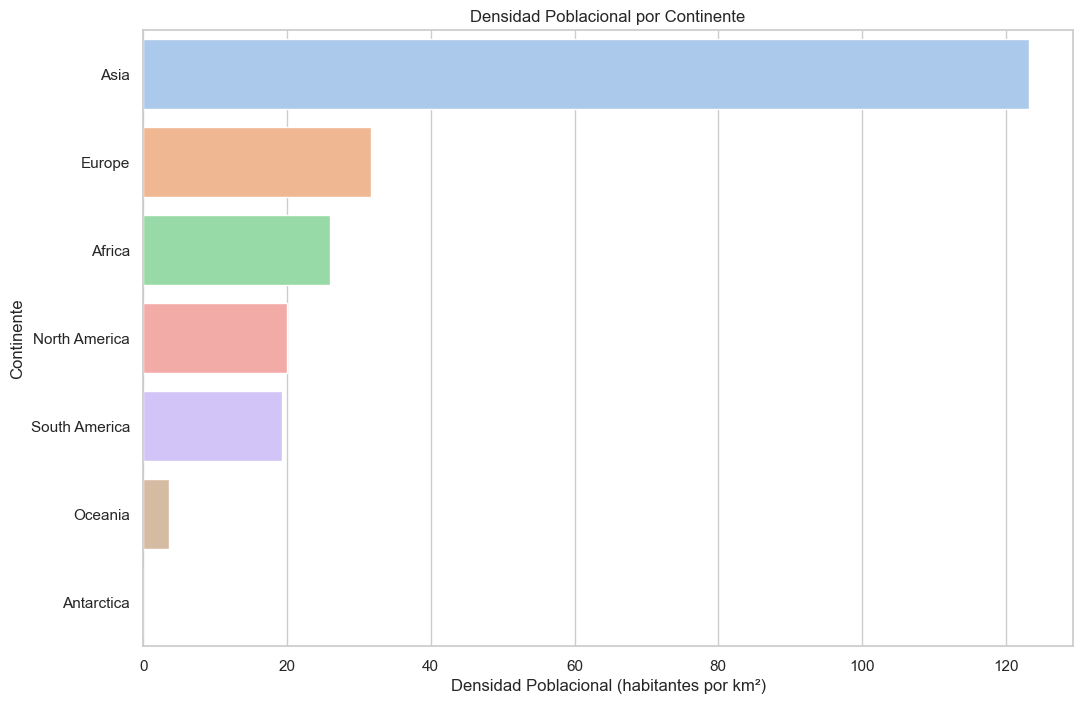

In [27]:
# Agrupar los datos y calcular la densidad poblacional
continent_density = country.groupby('Continent').apply(lambda x: x['Population'].sum() / x['SurfaceArea'].sum()).reset_index(name='PopulationDensity')

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='PopulationDensity', y='Continent', data=continent_density.sort_values(by='PopulationDensity', ascending=False))
plt.title('Densidad Poblacional por Continente')
plt.xlabel('Densidad Poblacional (habitantes por km²)')
plt.ylabel('Continente')

# Mostrar el gráfico
plt.show()

## ¿Cuáles son los 3 idiomas más hablados en el mundo (considerando solo los datos disponibles)?

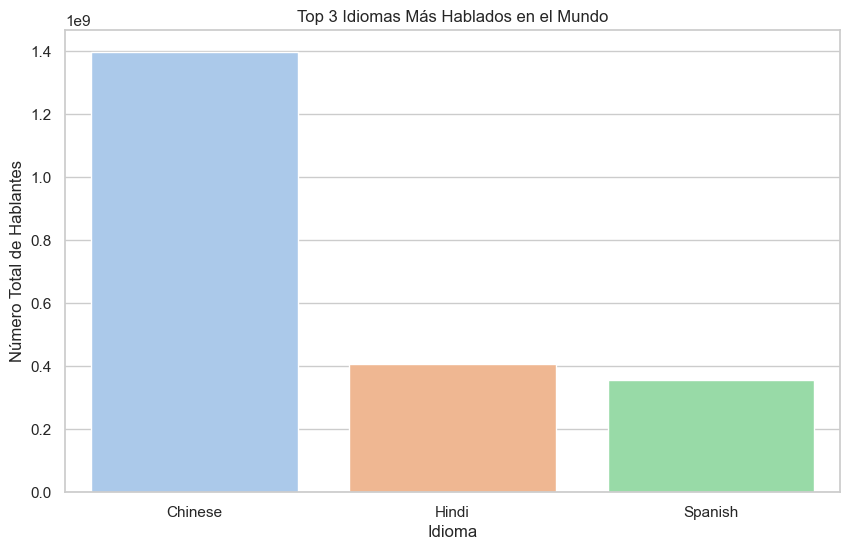

In [30]:
# Realizar la consulta y obtener los datos
language_speakers = country.merge(countrylanguage, left_on='Code', right_on='CountryCode')
language_speakers['TotalSpeakers'] = language_speakers['Population'] * language_speakers['Percentage'] / 100
language_speakers = language_speakers.groupby('Language')['TotalSpeakers'].sum().reset_index()
top3_languages = language_speakers.sort_values(by='TotalSpeakers', ascending=False).head(3)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Language', y='TotalSpeakers', data=top3_languages)
plt.title('Top 3 Idiomas Más Hablados en el Mundo')
plt.xlabel('Idioma')
plt.ylabel('Número Total de Hablantes')

# Mostrar el gráfico
plt.show()

## ¿Cuáles son los 3 países que tienen el mayor Producto Interno Bruto (PIB)?

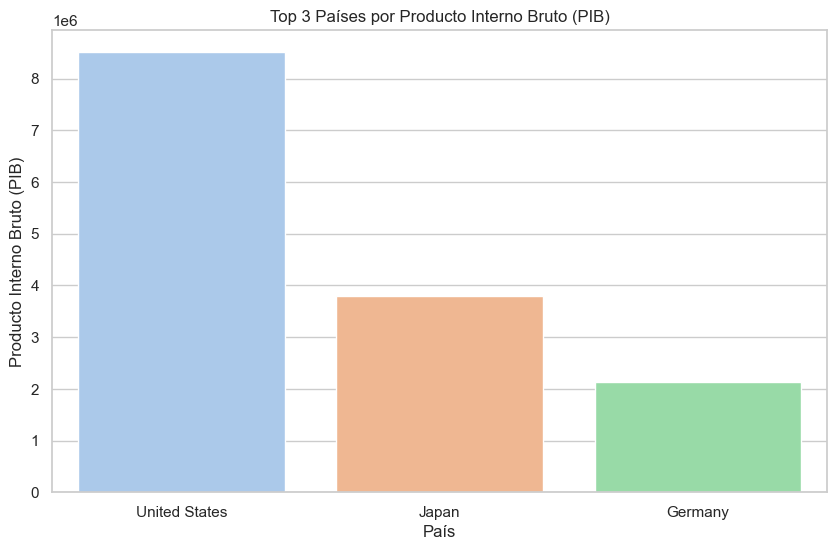

In [35]:
# Asegurarse de que la columna GNP es de tipo numérico
country['GNP'] = pd.to_numeric(country['GNP'], errors='coerce')

# Obtener los tres países con el mayor GNP
top3_gnp = country[['Name', 'GNP']].sort_values(by='GNP', ascending=False).head(3)

# Crear el gráfico de barras verticales
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='GNP', data=top3_gnp)
plt.title('Top 3 Países por Producto Interno Bruto (PIB)')
plt.xlabel('País')
plt.ylabel('Producto Interno Bruto (PIB)')

# Mostrar el gráfico
plt.show()

## ¿Cuál es la proporción de habitantes que viven en la capital de cada país respecto a su población total?

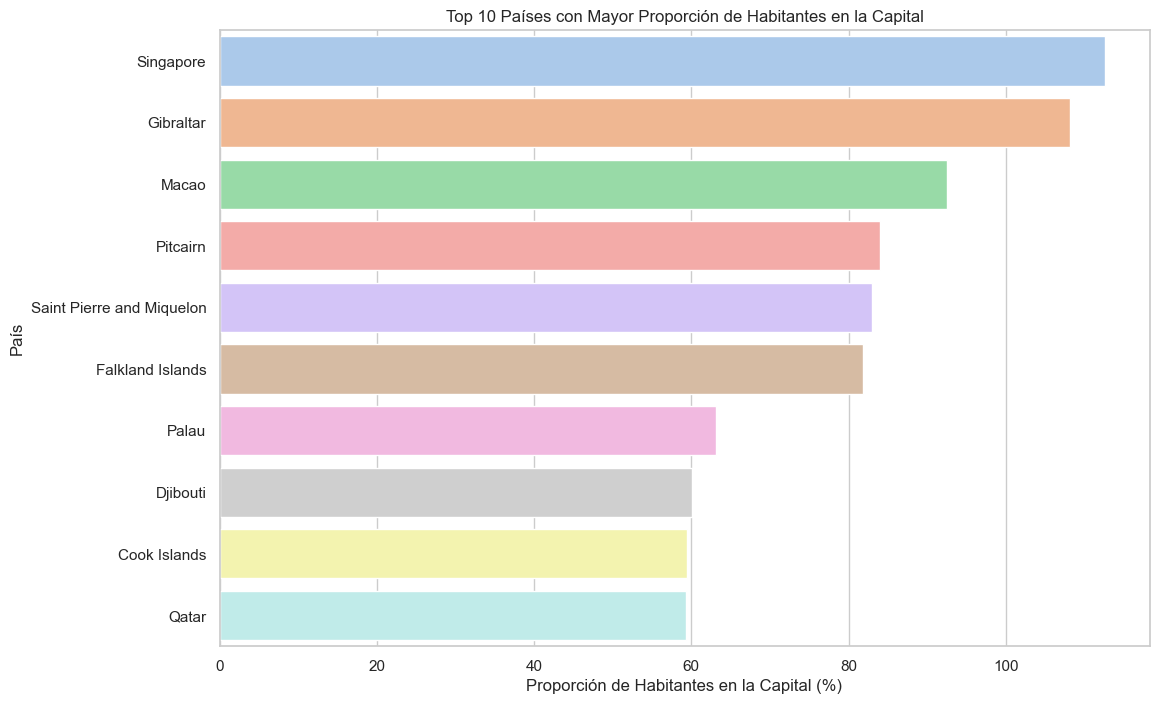

In [38]:
# Realizar la consulta y obtener los datos
merged_data = country.merge(city, left_on='Capital', right_on='ID', suffixes=('_country', '_city'))
merged_data['CapitalPopulationPercentage'] = (merged_data['Population_city'] / merged_data['Population_country']) * 100

# Ordenar los datos por CapitalPopulationPercentage y seleccionar los 10 primeros
top10_data = merged_data.sort_values(by='CapitalPopulationPercentage', ascending=False).head(10)

# Crear el gráfico de barras verticales
plt.figure(figsize=(12, 8))
sns.barplot(x='CapitalPopulationPercentage', y='Name_country', data=top10_data)
plt.title('Top 10 Países con Mayor Proporción de Habitantes en la Capital')
plt.xlabel('Proporción de Habitantes en la Capital (%)')
plt.ylabel('País')

# Mostrar el gráfico
plt.show()

## ¿Cuáles son los países con la mayor superficie terrestre en cada continente?

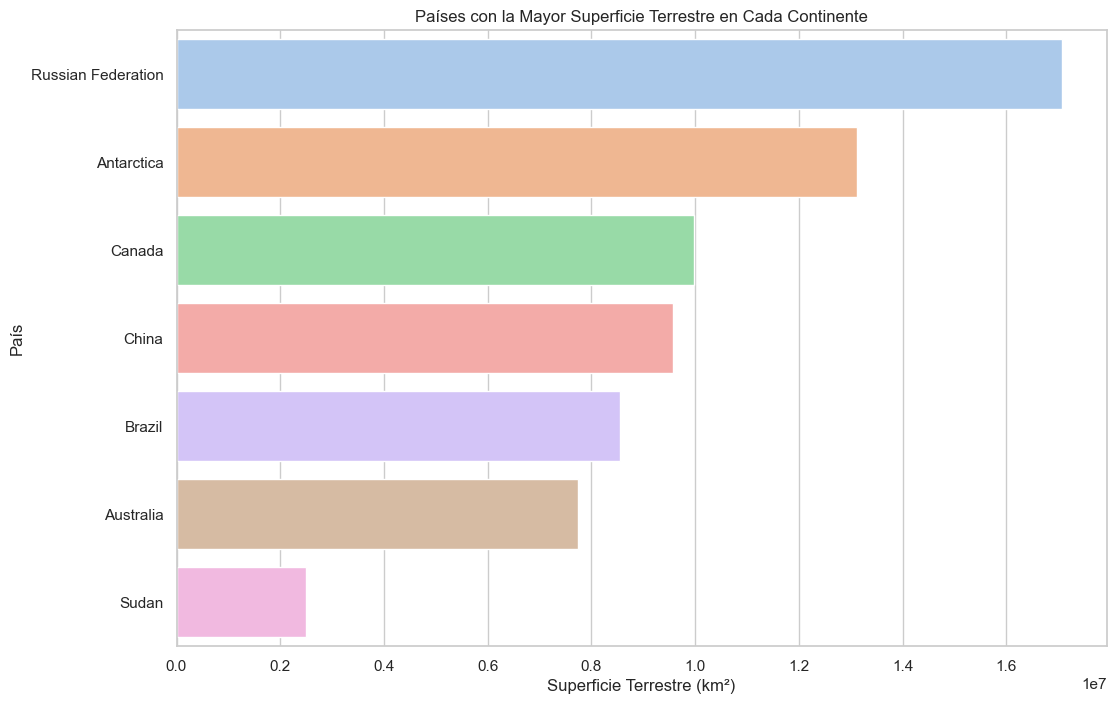

In [33]:
# Asegurarse de que la columna SurfaceArea es de tipo numérico
country['SurfaceArea'] = pd.to_numeric(country['SurfaceArea'], errors='coerce')

# Realizar la consulta y obtener los datos
largest_countries = country.loc[country.groupby('Continent')['SurfaceArea'].idxmax()].reset_index(drop=True)

# Crear el gráfico de barras verticales
plt.figure(figsize=(12, 8))
sns.barplot(x='SurfaceArea', y='Name', data=largest_countries.sort_values(by='SurfaceArea', ascending=False))
plt.title('Países con la Mayor Superficie Terrestre en Cada Continente')
plt.xlabel('Superficie Terrestre (km²)')
plt.ylabel('País')

# Mostrar el gráfico
plt.show()

## Superficie por continente

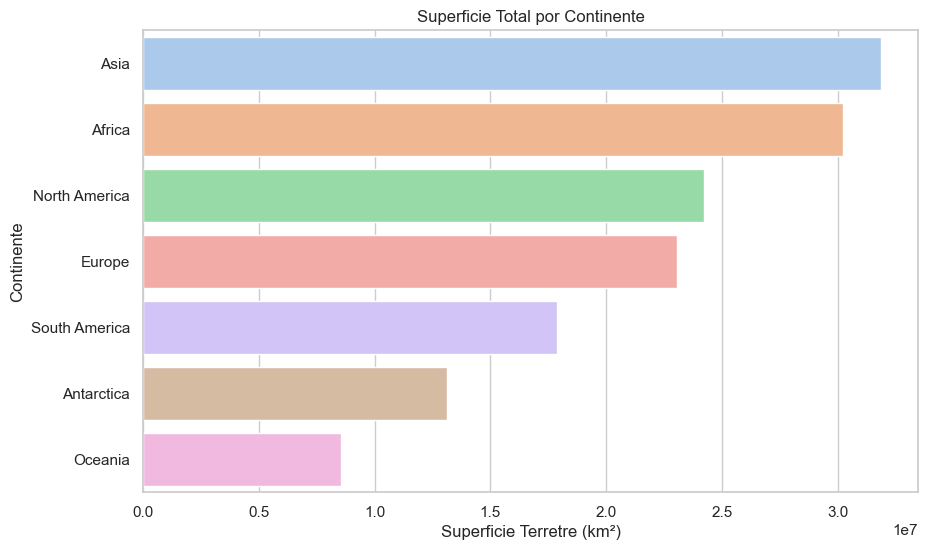

In [10]:
# Agrupar y sumar los datos para obtener la población total por continente
continent_surface = country.groupby('Continent')['SurfaceArea'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='SurfaceArea', y='Continent', data=continent_surface.sort_values('SurfaceArea', ascending=False))
plt.title('Superficie Total por Continente')
plt.xlabel('Superficie Terretre (km²)')
plt.ylabel('Continente')

# Mostrar el gráfico
plt.show()